# Libraries

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from PIL import Image


# Starting with custom data

White background, black digit.

## Load data

In [26]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Train')
print(f"Labels to train: {folders}")

y_total = []
x_total = []

for i in folders:
	images = os.listdir(f"Media/Train/{i}")
	for j in images:
		# Add labels
		y_total.append(int(i))
		# print(j)
		image_data = read_image(f"Media/Train/{i}/{j}")
		x_total.append(image_data)

y_total = np.array(y_total)
x_total = np.array(x_total)
x_total = np.squeeze(x_total)
print('LABELS:')
print(type(y_total))
print(y_total)
print('FEATURES:')
print(type(x_total))
print(f"Shape: {x_total.shape}")
print(x_total[1])

Labels to train: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
LABELS:
<class 'numpy.ndarray'>
[0 0 0 1 1 1 1 1 1 2 2 2 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 7 7 8 8 8 8
 9 9 9 9]
FEATURES:
<class 'numpy.ndarray'>
Shape: (41, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Pre-processing

In [27]:
# Process labels as per the special requirements of Tensorflow, 
# to accommodate for 10 features

for i in range(9):
	print(f"Before: {y_total[i]} | shape: {y_total[i].shape}")

y_total = to_categorical(y_total, 10)

for i in range(9):
	print(f"After: {y_total[i]} | shape: {y_total[i].shape}")

Before: 0 | shape: ()
Before: 0 | shape: ()
Before: 0 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
Before: 1 | shape: ()
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)
After: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] | shape: (10,)


## Train

In [28]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,))) # 28*28=784
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax')) # Output layer

# Compiling the model
model.compile(
	loss = 'categorical_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'])
model.summary()

model.fit( x_total, y_total, epochs=15, batch_size=10 )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
5/5 [==============================] 

## Test

1/1 [==============================] - 0s 89ms/step
1_1.png
Label: 1 | prediction: [1]


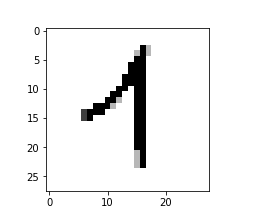

1/1 [==============================] - 0s 18ms/step
1_2.png
Label: 1 | prediction: [1]


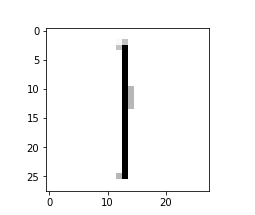

1/1 [==============================] - 0s 21ms/step
Digit_one.png
Label: 1 | prediction: [4]


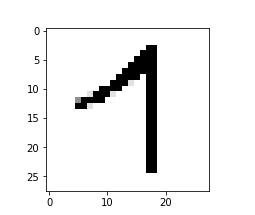

1/1 [==============================] - 0s 27ms/step
2_1.png
Label: 2 | prediction: [2]


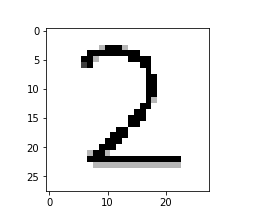

1/1 [==============================] - 0s 17ms/step
Digit_two.png
Label: 2 | prediction: [2]


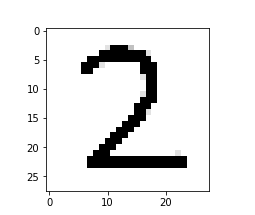

1/1 [==============================] - 0s 27ms/step
3_1.png
Label: 3 | prediction: [3]


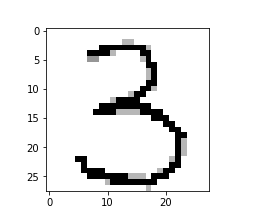

1/1 [==============================] - 0s 16ms/step
Digit_four.png
Label: 4 | prediction: [4]


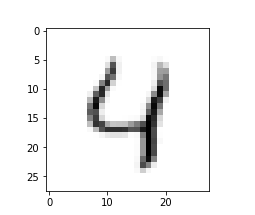

1/1 [==============================] - 0s 20ms/step
Digit_five (2).png
Label: 5 | prediction: [5]


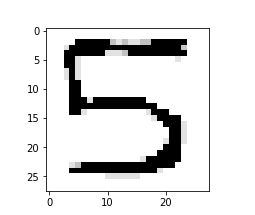

1/1 [==============================] - 0s 28ms/step
Digit_five.png
Label: 5 | prediction: [3]


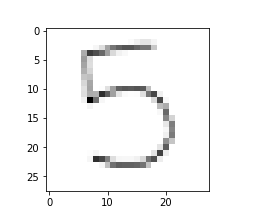

In [29]:
def read_image(file_path):
	""" Read one image from a path """
	img = Image.open(file_path)
	img = img.convert("L")
	img = img.resize((28,28))
	data = list(img.getdata())
	for i in range(len(data)):
		data[i] = 255 - data[i]
	data = [data]
	data = np.array(data)/256
	return data

folders = os.listdir('Media/Test')
number = 9; counter = 1
# fig = plt.figure(figsize=(20,20))
for i in folders:
	images = os.listdir(f"Media/Test/{i}")
	for j in images:
		# Prediction
		image_data = read_image(f"Media/Test/{i}/{j}")
		predictions_vector = model.predict(image_data)
		predictions = [ np.argmax(i) for i in predictions_vector ]
		predictions
		print(j)
		print(f"Label: {i} | prediction: {predictions}")
		# Graph
		# fig.add_subplot(1, number, counter, xticks=[], yticks=[])
		plt.figure(figsize=(3,3))
		plot = image_data.reshape(28,28)
		plt.imshow(plot, cmap='Greys')
		plt.title(f'Label: {i} | prediction: {predictions}', color='white', size=20)
		plt.show()
		counter += 1

